<a href="https://colab.research.google.com/github/muhammadsajad/Books/blob/main/Practical_Deep_Learning_for_Cloud%2C_Mobile_%26_Edge/Chapter_3_Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Give the path of kaggle.jason file in order to download data directly from kaggle.
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [3]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

100% 811M/814M [00:26<00:00, 38.0MB/s]
100% 814M/814M [00:26<00:00, 32.7MB/s]


In [5]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/550.jpg            
  inflating: test/5500.jpg           
  inflating: test/5501.jpg           
  inflating: test/5502.jpg           
  inflating: test/5503.jpg           
  inflating: test/5504.jpg           
  inflating: test/5505.jpg           
  inflating: test/5506.jpg           
  inflating: test/5507.jpg           
  inflating: test/5508.jpg           
  inflating: test/5509.jpg           
  inflating: test/551.jpg            
  inflating: test/5510.jpg           
  inflating: test/5511.jpg           
  inflating: test/5512.jpg           
  inflating: test/5513.jpg           
  inflating: test/5514.jpg           
  inflating: test/5515.jpg           
  inflating: test/5516.jpg           
  inflating: test/5517.jpg           
  inflating: test/5518.jpg           
  inflating: test/5519.jpg           
  inflating: test/552.jpg            
  inflating: test/5520.jpg           
  inflating: test/5521.jpg           

In [6]:
!mkdir train val

In [7]:
!mkdir train/cat train/dog

In [8]:
!mkdir val/cat val/dog

In [9]:
!mkdir source_data

In [10]:
!mkdir source_data/cat source_data/dog

In [12]:
import shutil
import os
import random

def copy_files_with_keyword(src_folder, dest_folder, keyword):
    try:
        # Create the destination folder if it doesn't exist
        os.makedirs(dest_folder, exist_ok=True)

        # Iterate through all files in the source folder
        for file_name in os.listdir(src_folder):
            # Check if the keyword is present in the file name
            if keyword in file_name:
                # Construct the full paths for the source and destination files
                src_path = os.path.join(src_folder, file_name)
                dest_path = os.path.join(dest_folder, file_name)

                # Copy the file from source to destination
                shutil.copy(src_path, dest_path)
                print(f"File '{file_name}' copied successfully from {src_folder} to {dest_folder}")

        print(f"All files containing the keyword '{keyword}' have been copied.")
    except FileNotFoundError:
        print(f"Source folder '{src_folder}' not found.")
    except PermissionError:
        print(f"Permission error while copying files.")

# Example usage
source_folder = '/content/data'
destination_folder = '/content/source_data/dog'
keyword = 'dog'

copy_files_with_keyword(source_folder, destination_folder, keyword)


Streaming output truncated to the last 5000 lines.
File 'dog.7911.jpg' copied successfully from /content/data to /content/source_data/dog
File 'dog.11876.jpg' copied successfully from /content/data to /content/source_data/dog
File 'dog.5583.jpg' copied successfully from /content/data to /content/source_data/dog
File 'dog.10158.jpg' copied successfully from /content/data to /content/source_data/dog
File 'dog.5676.jpg' copied successfully from /content/data to /content/source_data/dog
File 'dog.4745.jpg' copied successfully from /content/data to /content/source_data/dog
File 'dog.5394.jpg' copied successfully from /content/data to /content/source_data/dog
File 'dog.8371.jpg' copied successfully from /content/data to /content/source_data/dog
File 'dog.10725.jpg' copied successfully from /content/data to /content/source_data/dog
File 'dog.11735.jpg' copied successfully from /content/data to /content/source_data/dog
File 'dog.6962.jpg' copied successfully from /content/data to /content/sour

In [13]:
# split_data
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets

  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training

  Returns:
    None
  """

  shuffle_list=random.sample(os.listdir(SOURCE_DIR),len(os.listdir(SOURCE_DIR)))

  training_number=int(len(shuffle_list)*SPLIT_SIZE)

  i=0
  target=TRAINING_DIR

  for item in shuffle_list:
    item_source=os.path.join(SOURCE_DIR,item)
    if os.path.getsize(item_source)==0:
      print(f'{item}is zero length, so ignoring.')
    else:
      copyfile(item_source,os.path.join(target,item))
      i+=1

    if i==training_number:
      target=VALIDATION_DIR


In [14]:


# Define paths
Cat_SOURCE_DIR = "/content/source_data/cat"
Dog_SOURCE_DIR = "/content/source_data/dog"

TRAINING_DIR = "/content/train"
VALIDATION_DIR = "/content/val"

TRAINING_Cat_DIR = os.path.join(TRAINING_DIR, "cat/")
TRAINING_Dog_DIR=os.path.join(TRAINING_DIR,"dog/")



VALIDATION_Cat_DIR = os.path.join(VALIDATION_DIR, "cat/")
VALIDATION_Dog_DIR=os.path.join(VALIDATION_DIR,"dog/")


# Define proportion of images used for training
split_size = .80

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(Cat_SOURCE_DIR, TRAINING_Cat_DIR,VALIDATION_Cat_DIR, split_size)
split_data(Dog_SOURCE_DIR, TRAINING_Dog_DIR,VALIDATION_Dog_DIR, split_size)

# Check that the number of images matches the expected output

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_Cat_DIR))} images of Cat for training")
print(f"There are {len(os.listdir(TRAINING_Dog_DIR))} images of Dog for training")

print(f"There are {len(os.listdir(VALIDATION_Cat_DIR))} images of Cat for validation")
print(f"There are {len(os.listdir(VALIDATION_Dog_DIR))} images of Dog for validation")

There are 10000 images of Cat for training
There are 10000 images of Dog for training
There are 2500 images of Cat for validation
There are 2500 images of Dog for validation


In [45]:
TRAIN_DATA_DIR = 'train'
VALIDATION_DATA_DIR = 'val/'
TRAIN_SAMPLES = 500
VALIDATION_SAMPLES = 500
NUM_CLASSES = 2
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 64

In [16]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                 rotation_range=20,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 zoom_range=0.2)

In [17]:
val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [18]:
train_generator=train_datagen.flow_from_directory(TRAIN_DATA_DIR,
                                                  target_size=(IMG_WIDTH,IMG_HEIGHT),
                                                  batch_size=BATCH_SIZE,
                                                  shuffle=True,
                                                  seed=12345,
                                                  class_mode='categorical')

Found 20000 images belonging to 2 classes.


In [19]:
validation_generator=val_datagen.flow_from_directory(VALIDATION_DATA_DIR,
                                                     target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=False,
                                                     class_mode='categorical')

Found 5000 images belonging to 2 classes.


In [20]:
def model_maker():
  base_model=MobileNet(include_top=False,input_shape=(IMG_WIDTH, IMG_HEIGHT,3))
  for layer in base_model.layers[:]:
    layer.trainable=False # Freeze the layers
  input=Input(shape=(IMG_WIDTH, IMG_HEIGHT,3))
  custom_model=base_model(input)
  custom_model=GlobalAveragePooling2D()(custom_model)
  custom_model=Dense(64, activation='relu')(custom_model)
  custom_model=Dropout(0.5)(custom_model)
  predictions=Dense(NUM_CLASSES, activation='softmax')(custom_model)

  return Model(inputs=input, outputs=predictions)


In [21]:
model=model_maker()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['acc'])
num_steps=math.ceil(float(TRAIN_SAMPLES)/BATCH_SIZE)
model.fit_generator(train_generator,
                    steps_per_epoch=num_steps,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=num_steps)

17225924/17225924 [==============================] - 1s 0us/step


<ipython-input-21-41ddae522105>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


Epoch 1/10
8/8 [==============================] - 21s 1s/step - loss: 0.7033 - acc: 0.7207 - val_loss: 0.0604 - val_acc: 0.9707
Epoch 2/10
8/8 [==============================] - 11s 1s/step - loss: 0.2795 - acc: 0.8926 - val_loss: 0.0931 - val_acc: 0.9590
Epoch 3/10
8/8 [==============================] - 11s 1s/step - loss: 0.1788 - acc: 0.9258 - val_loss: 0.0894 - val_acc: 0.9590
Epoch 4/10
8/8 [==============================] - 11s 1s/step - loss: 0.1623 - acc: 0.9297 - val_loss: 0.0736 - val_acc: 0.9609
Epoch 5/10
8/8 [==============================] - 10s 1s/step - loss: 0.1267 - acc: 0.9590 - val_loss: 0.0453 - val_acc: 0.9805
Epoch 6/10
8/8 [==============================] - 11s 1s/step - loss: 0.1462 - acc: 0.9336 - val_loss: 0.0382 - val_acc: 0.9824
Epoch 7/10
8/8 [==============================] - 11s 1s/step - loss: 0.0787 - acc: 0.9668 - val_loss: 0.0589 - val_acc: 0.9707
Epoch 8/10
8/8 [==============================] - 11s 1s/step - loss: 0.1268 - acc: 0.9512 - val_loss: 0

In [22]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:

model=load_model ('model.h5')

In [24]:

import numpy as np
img_path='/content/test/1000.jpg'
img=image.load_img(img_path, target_size=(224,224))
img_array=image.img_to_array(img)
expand_img_array=np.expand_dims(img_array,axis=0)
preprocessed_img=preprocess_input(expand_img_array)
prediction=model.predict(preprocessed_img)
print(prediction)
print(validation_generator.class_indices)

1/1 [==============================] - 1s 842ms/step
[[0.0033758  0.99662423]]
{'cat': 0, 'dog': 1}


In [25]:
# Let's view the names of the files.
filenames = validation_generator.filenames
print(len(filenames))
print(filenames[:10])


5000
['cat/cat.100.jpg', 'cat/cat.1000.jpg', 'cat/cat.10003.jpg', 'cat/cat.10005.jpg', 'cat/cat.10008.jpg', 'cat/cat.10013.jpg', 'cat/cat.10018.jpg', 'cat/cat.1002.jpg', 'cat/cat.10024.jpg', 'cat/cat.10025.jpg']


In [26]:
ground_truth = validation_generator.classes
print(ground_truth[:10])
print(len(ground_truth))

[0 0 0 0 0 0 0 0 0 0]
5000


In [27]:
label_to_index = validation_generator.class_indices
print(label_to_index)

{'cat': 0, 'dog': 1}


In [28]:
index_to_label = dict((v, k) for k, v in label_to_index.items())
print(index_to_label)

{0: 'cat', 1: 'dog'}


In [29]:
predictions = model.predict_generator(validation_generator,
                                      steps=None)

<ipython-input-29-724524e4f5f4>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(validation_generator,


In [30]:
print(predictions[:10])

[[9.9944800e-01 5.5204338e-04]
 [9.9791104e-01 2.0888883e-03]
 [9.9998379e-01 1.6176933e-05]
 [9.9801946e-01 1.9805487e-03]
 [9.9646783e-01 3.5322204e-03]
 [9.1211504e-01 8.7884910e-02]
 [9.9712938e-01 2.8705823e-03]
 [9.9966121e-01 3.3879463e-04]
 [9.7409523e-01 2.5904734e-02]
 [6.6142775e-02 9.3385726e-01]]


In [31]:
prediction_index = []
for prediction in predictions:
    prediction_index.append(np.argmax(prediction))

In [32]:
print(prediction_index[:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [33]:
def accuracy(predictions, ground_truth):
    total = 0
    for i, j in zip(predictions, ground_truth):
        if i == j:
            total += 1
    return total * 1.0 / len(predictions)

In [34]:
print(accuracy(prediction_index, ground_truth))

0.9744


In [35]:
prediction_table = {}
for index, val in enumerate(predictions):
    index_of_highest_probability = np.argmax(val)
    value_of_highest_probability = val[index_of_highest_probability]
    prediction_table[index] = [
        value_of_highest_probability, index_of_highest_probability,
        ground_truth[index]
    ]
assert len(predictions) == len(ground_truth) == len(prediction_table)

In [36]:
print(prediction_table)

{0: [0.999448, 0, 0], 1: [0.99791104, 0, 0], 2: [0.9999838, 0, 0], 3: [0.99801946, 0, 0], 4: [0.9964678, 0, 0], 5: [0.91211504, 0, 0], 6: [0.9971294, 0, 0], 7: [0.9996612, 0, 0], 8: [0.9740952, 0, 0], 9: [0.93385726, 1, 0], 10: [0.99591005, 0, 0], 11: [0.9998273, 0, 0], 12: [0.9998429, 0, 0], 13: [0.9925552, 0, 0], 14: [0.99861526, 0, 0], 15: [0.99994314, 0, 0], 16: [0.99834, 0, 0], 17: [0.9978666, 0, 0], 18: [0.999276, 0, 0], 19: [0.9999502, 0, 0], 20: [0.99998546, 0, 0], 21: [0.9992787, 0, 0], 22: [0.99993455, 0, 0], 23: [0.9998907, 0, 0], 24: [0.99980456, 0, 0], 25: [0.9975363, 0, 0], 26: [0.9999554, 0, 0], 27: [0.8816755, 0, 0], 28: [0.9985183, 0, 0], 29: [0.9970573, 0, 0], 30: [0.9999002, 0, 0], 31: [0.65271163, 0, 0], 32: [0.99939597, 0, 0], 33: [0.99871576, 0, 0], 34: [0.9975617, 0, 0], 35: [0.99778265, 0, 0], 36: [0.9999268, 0, 0], 37: [0.999821, 0, 0], 38: [0.9999862, 0, 0], 39: [0.99995995, 0, 0], 40: [0.9940553, 0, 0], 41: [0.99975806, 0, 0], 42: [0.99989796, 0, 0], 43: [0.9

In [46]:
def get_images_with_sorted_probabilities(prediction_table,
                                         get_highest_probability,
                                         label,
                                         number_of_items,
                                         only_false_predictions=False):
    sorted_prediction_table = [(k, prediction_table[k])
                               for k in sorted(prediction_table,
                                               key=prediction_table.get,
                                               reverse=get_highest_probability)
                               ]
    result = []
    for index, key in enumerate(sorted_prediction_table):
        image_index, [probability, predicted_index, gt] = key
        if predicted_index == label:
            if only_false_predictions == True:
                if predicted_index != gt:
                    result.append(
                        [image_index, [probability, predicted_index, gt]])
            else:
                result.append(
                    [image_index, [probability, predicted_index, gt]])
    return result[:number_of_items]

In [53]:
def plot_images(filenames, distances, message):
    images = []
    for filename in filenames:
        images.append(mpimg.imread(filename))
    plt.figure(figsize=(20, 15))
    columns = 5
    for i, image in enumerate(images):
        ax = plt.subplot(int(len(images) / columns + 1), columns, i + 1)
        ax.set_title("\n\n" + filenames[i].split("/")[-1] + "\n" +
                     "\nProbability: " +
                     str(float("{0:.2f}".format(distances[i]))))
        plt.suptitle(message, fontsize=20, fontweight='bold')
        plt.axis('off')
        plt.imshow(image)

def display(sorted_indices, message):
    similar_image_paths = []
    distances = []
    for name, value in sorted_indices:
        [probability, predicted_index, gt] = value
        similar_image_paths.append(VALIDATION_DATA_DIR + filenames[name])
        distances.append(probability)
    plot_images(similar_image_paths, distances, message)

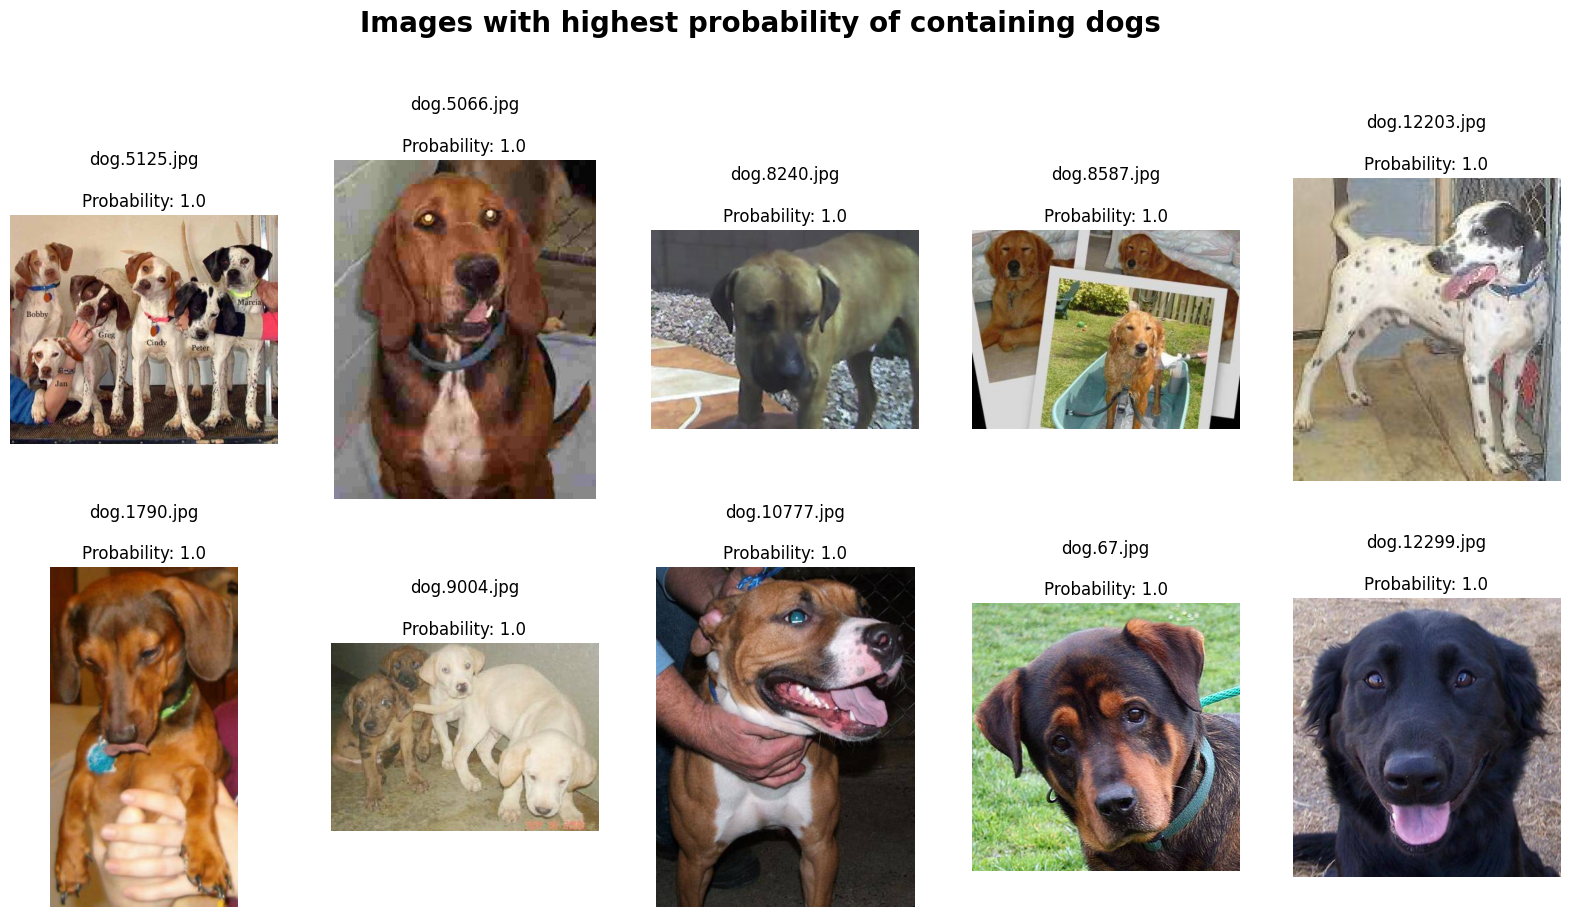

In [54]:
most_confident_dog_images = get_images_with_sorted_probabilities(prediction_table, True, 1, 10,
                                               False)
message = 'Images with highest probability of containing dogs'
display(most_confident_dog_images, message)

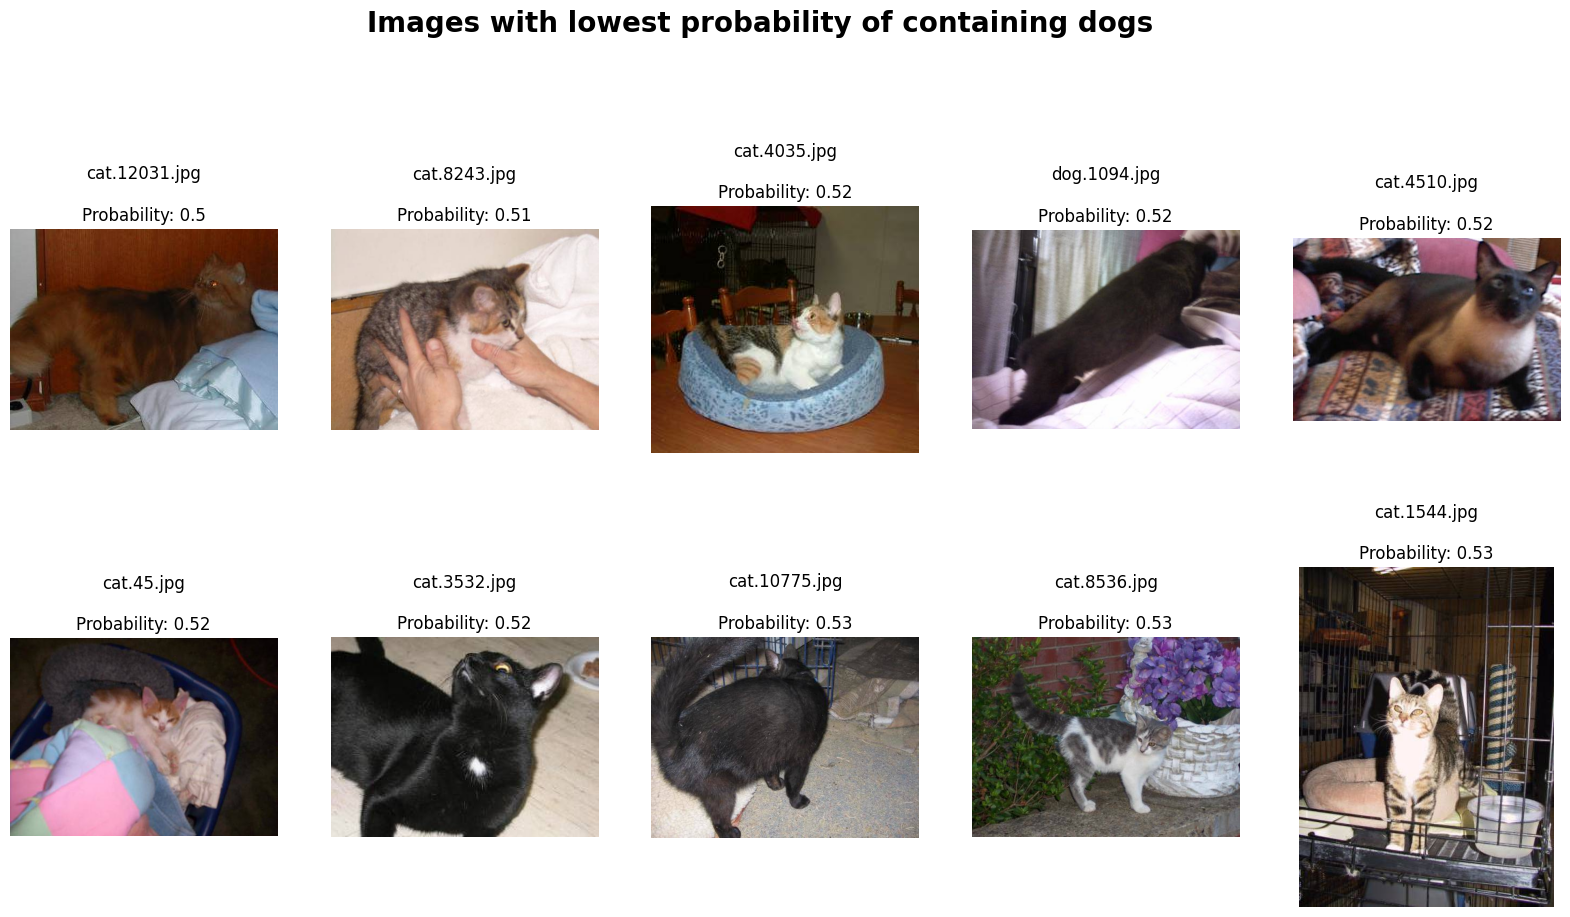

In [57]:
least_confident_dog_images = get_images_with_sorted_probabilities(prediction_table, False, 1, 10,
                                               False)
message = 'Images with lowest probability of containing dogs'
display(least_confident_dog_images, message)

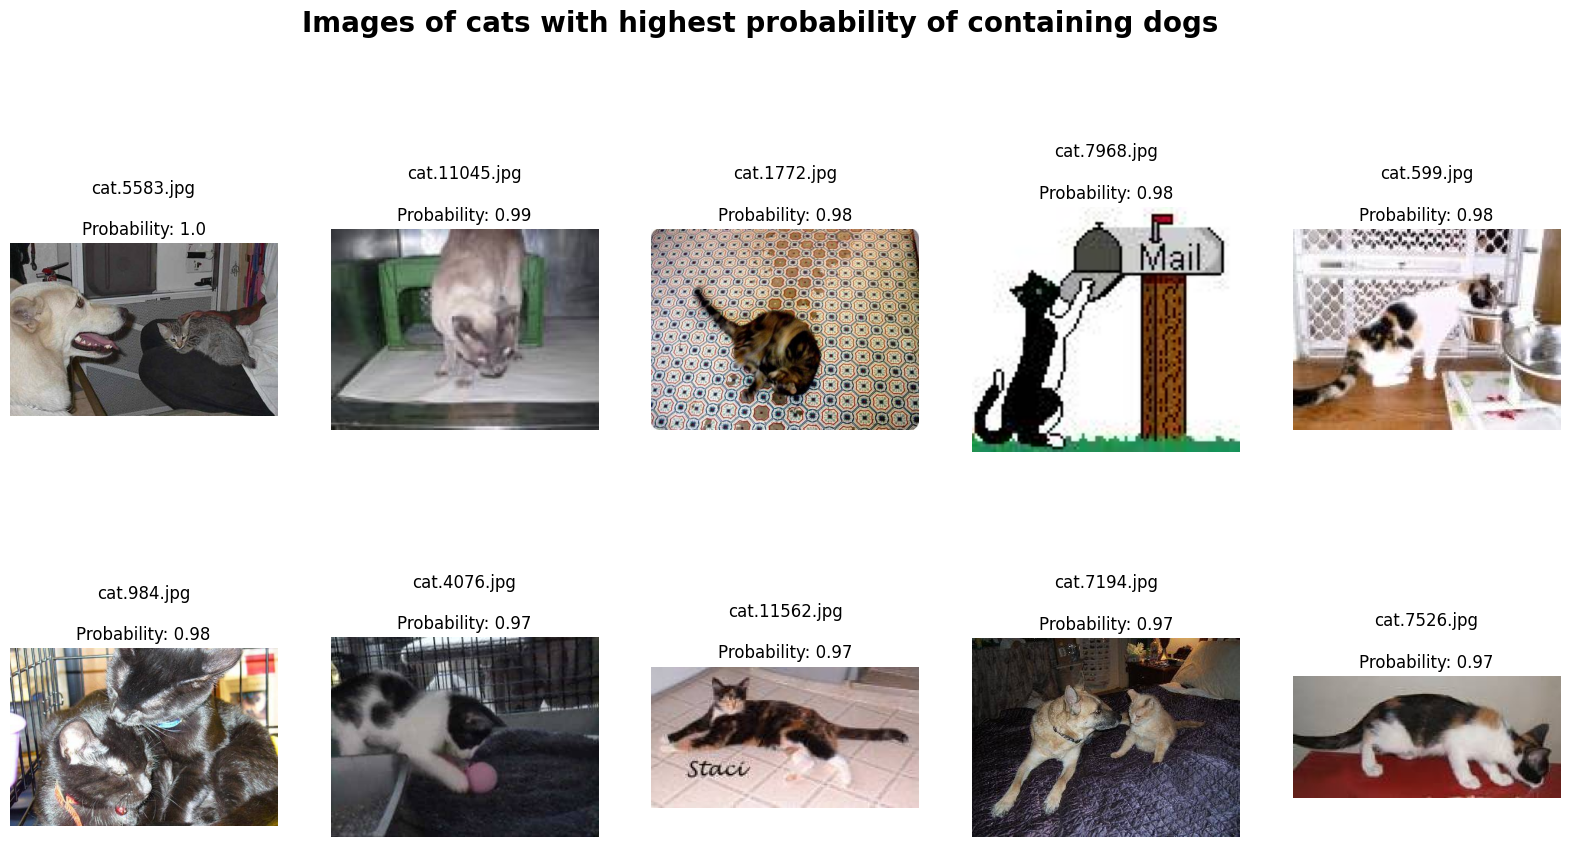

In [58]:
incorrect_dog_images = get_images_with_sorted_probabilities(prediction_table, True, 1, 10,
                                               True)
message = 'Images of cats with highest probability of containing dogs'
display(incorrect_dog_images, message)

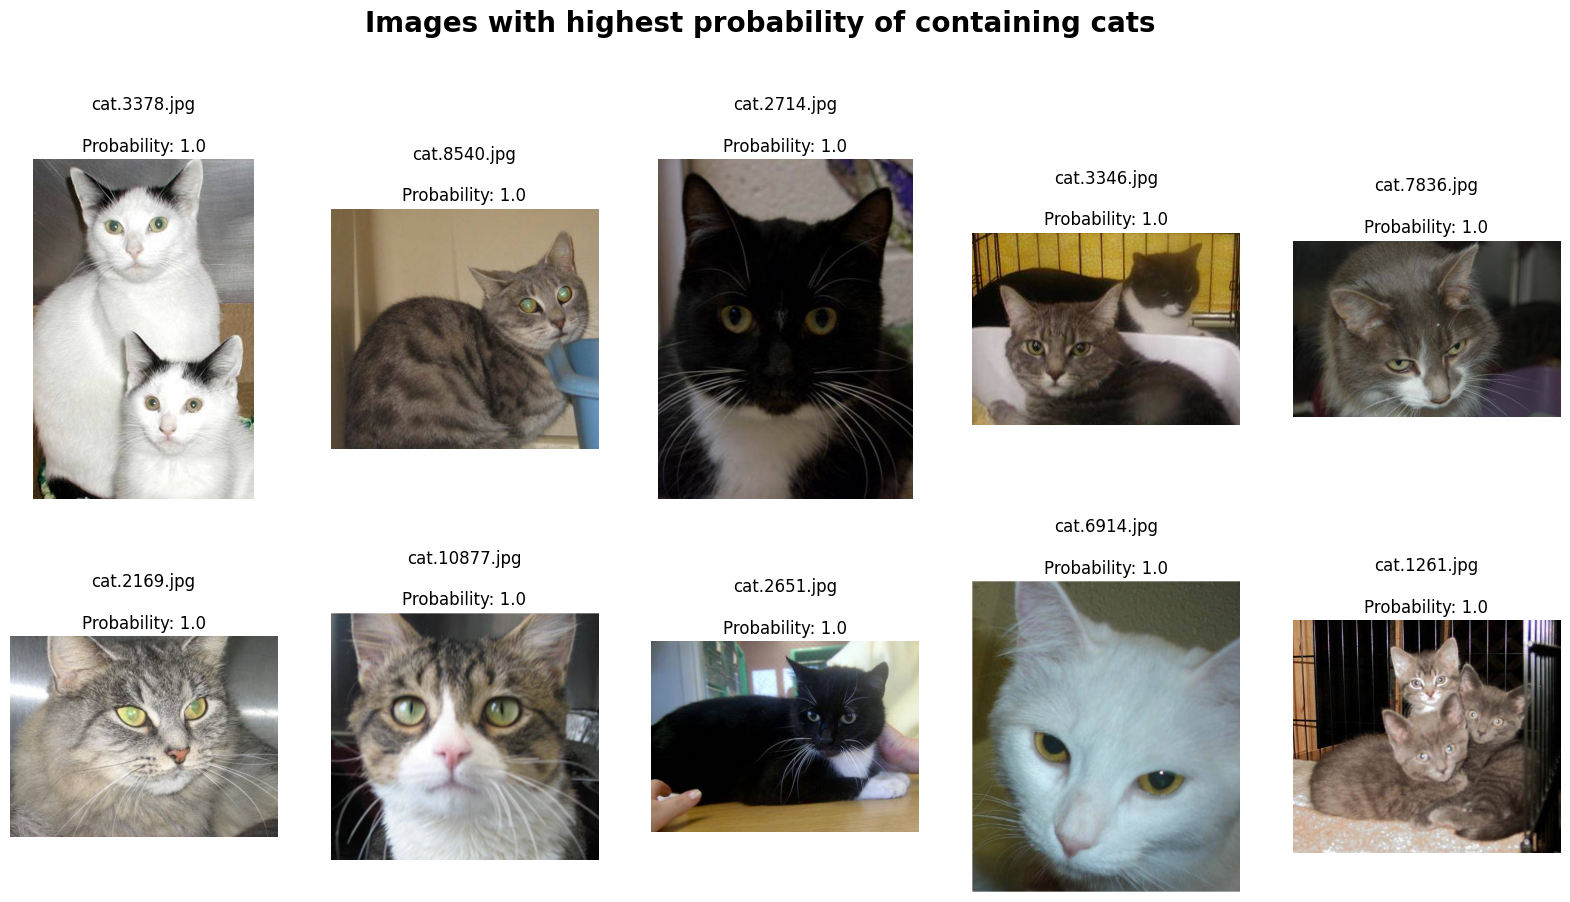

In [59]:
most_confident_cat_images = get_images_with_sorted_probabilities(prediction_table, True, 0, 10,
                                               False)
message = 'Images with highest probability of containing cats'
display(most_confident_cat_images, message)

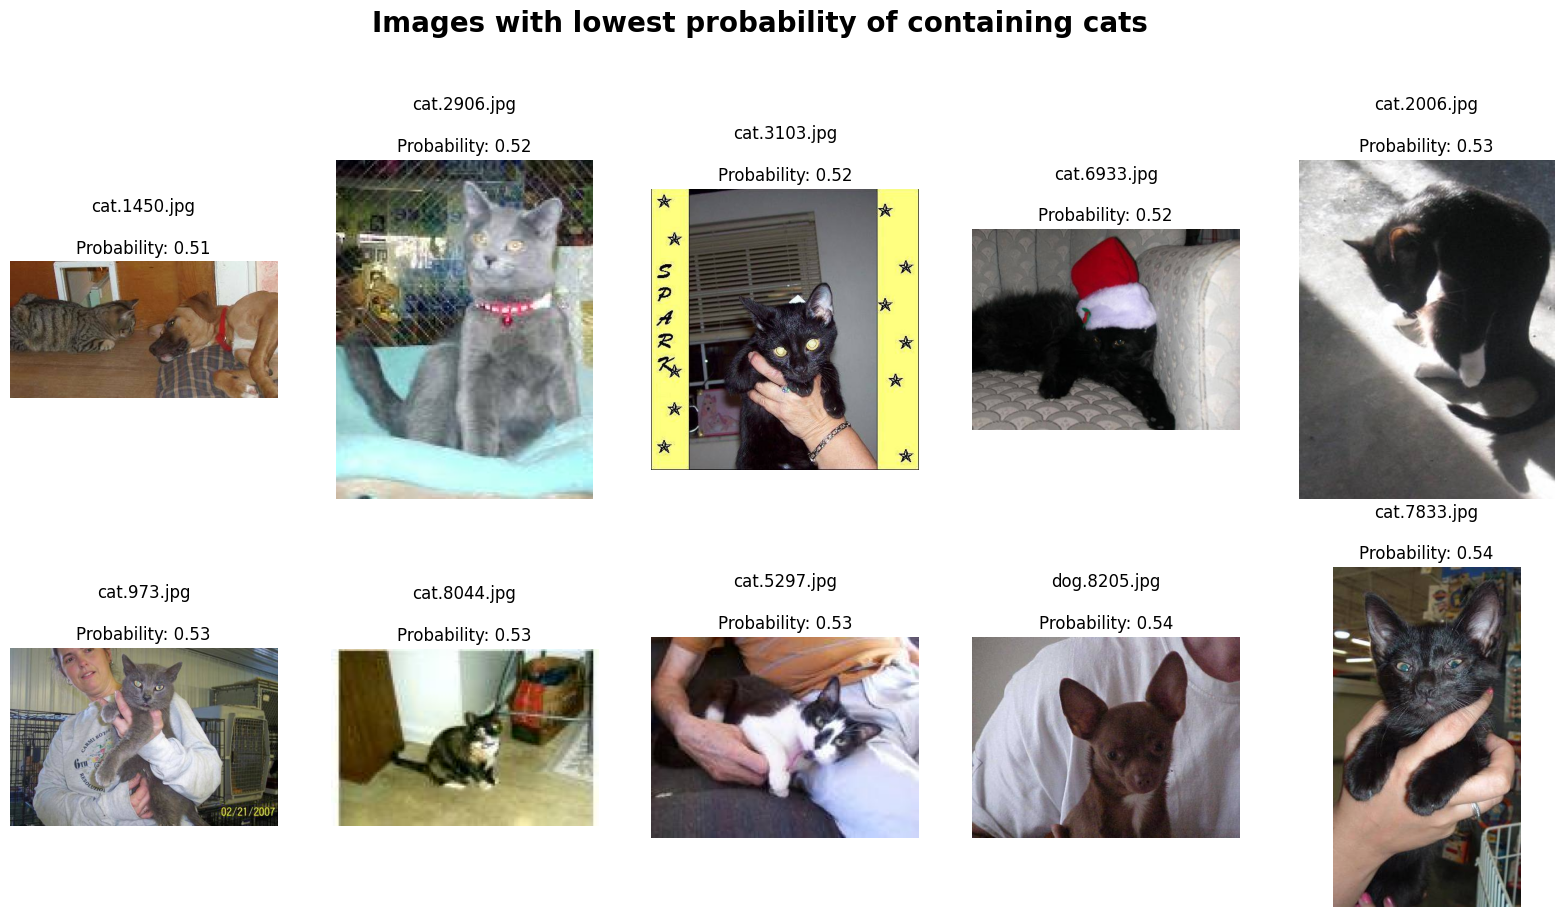

In [60]:
least_confident_cat_images = get_images_with_sorted_probabilities(prediction_table, False, 0, 10,
                                               False)
message = 'Images with lowest probability of containing cats'
display(least_confident_cat_images, message)

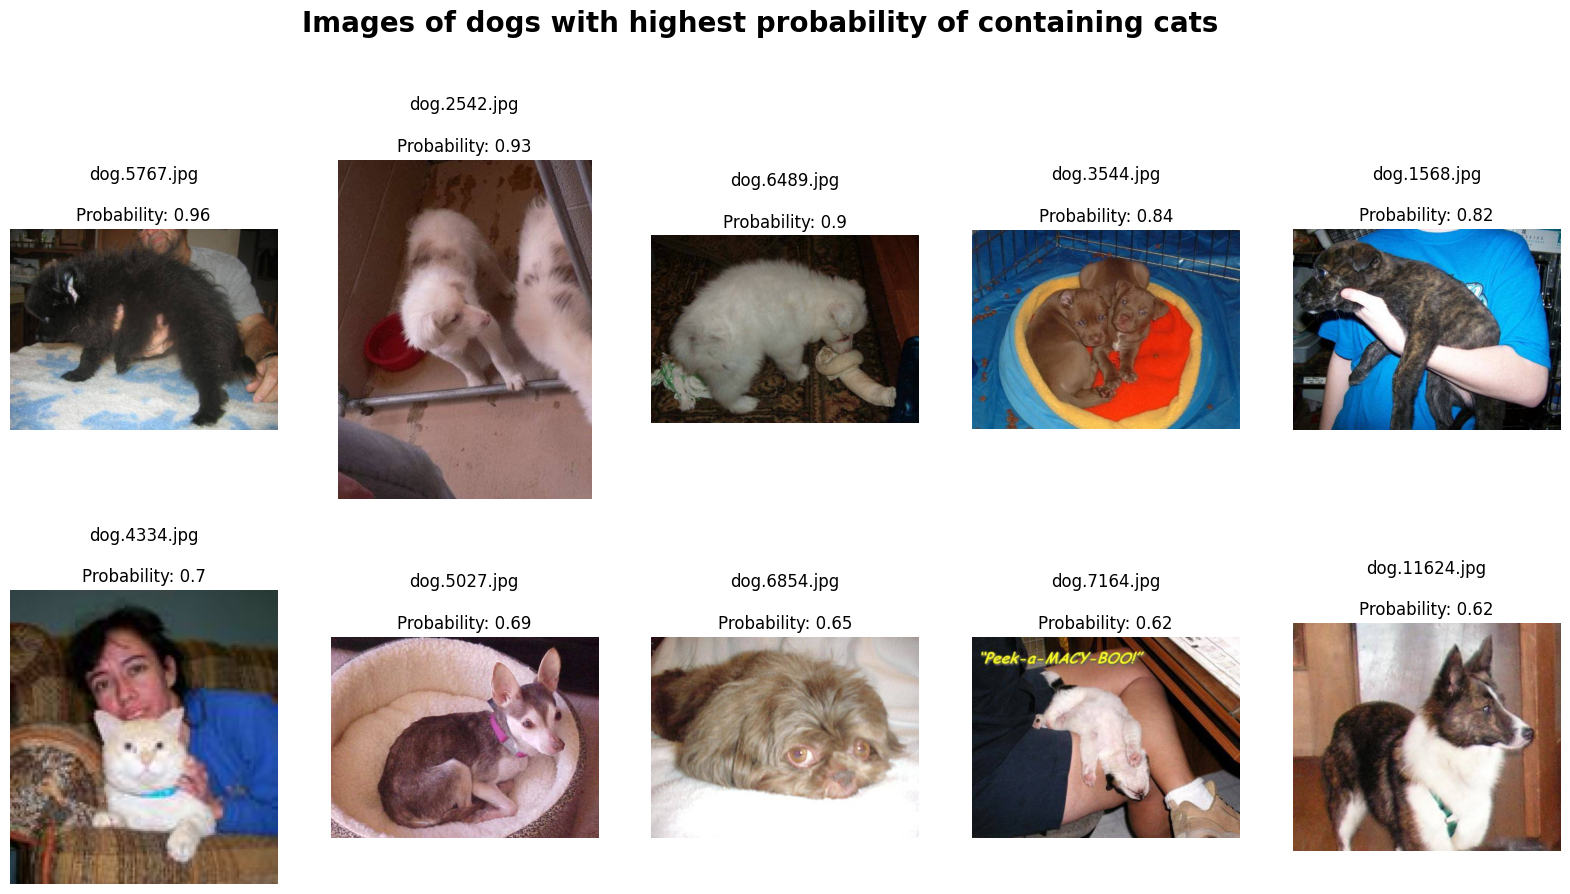

In [61]:
incorrect_cat_images = get_images_with_sorted_probabilities(prediction_table, True, 0, 10,
                                               True)
message = 'Images of dogs with highest probability of containing cats'
display(incorrect_cat_images, message)